## ANALISIS DE DATOS 

### Dayana Zuñiga Muñoz 

### Predicción de sobrevivientes Titanic con Regresión Logística

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos


#### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [115]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [116]:
# lectura de datos en Python y lo cargamos en la variable Datos
dataset = pd.read_csv('./Titanic-Dataset.csv')

In [117]:
# Realizamos lectura de los Datos para el análisis exploratorio
dataset.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [118]:
# Descripción de los datos
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y  Valores Atípicos de tarifa de pasajeros ')

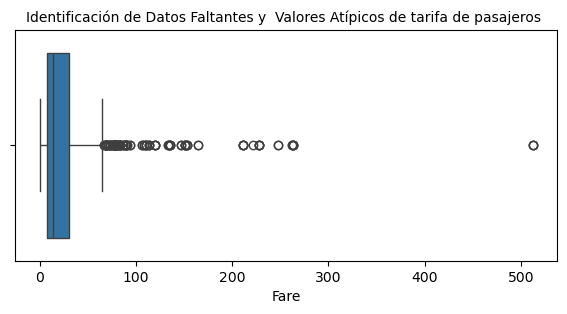

In [119]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['Fare'])
plt.title('Identificación de Datos Faltantes y  Valores Atípicos de tarifa de pasajeros ', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y  Valores Atípicos de numero de hermanos')

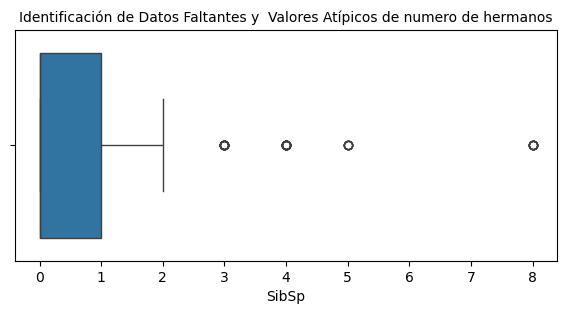

In [120]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['SibSp'])
plt.title('Identificación de Datos Faltantes y  Valores Atípicos de numero de hermanos', fontsize=10 )

#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [121]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Edad: ",dataset['Age'].isin([0]).sum())
print("Cantidad de Registros nulos en Edad: ",dataset['Age'].isna().sum())
print("Cantidad de Registros con cero en Tarifa de pasajero: ",dataset['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros nulos en Edad:  177
Cantidad de Registros con cero en Tarifa de pasajero:  15


In [122]:
# Remplazar datos faltantes
dataset['Fare']=dataset['Fare'].replace(0,dataset['Fare'].mean())

In [123]:
#Revisión nuevamente de datos faltantes
print("Cantidad de Registros con cero en tarifa de pasajero: ",dataset['Fare'].isin([0]).sum())

Cantidad de Registros con cero en tarifa de pasajero:  0


In [124]:
dataset = dataset.dropna(subset=['Age'])

In [125]:
print("Cantidad de Registros nulos en Edad: ",dataset['Age'].isna().sum())

Cantidad de Registros nulos en Edad:  0


In [126]:
#Conteo de Datos Atípico
nivel_minimo=0
nivel_maximo=2
Total_Atipicos=((dataset['SibSp']<nivel_minimo)|(dataset['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 35


In [127]:
dataset=dataset[(dataset['SibSp']<nivel_maximo)&(dataset['SibSp']>nivel_minimo)]

In [128]:
Total_Atipicos=((dataset['SibSp']<nivel_minimo)|(dataset['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [129]:
#Revisión del tipo de datos y datos faltantes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 874
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        64 non-null     object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


#### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


##### Caracteriticas de interes:

Survived: Si el pasajero sobrevivió o no (0 = no sobrevivió - 1 = si sobrevivió)



In [130]:
dataset['Survived'].value_counts()


Survived
1    97
0    86
Name: count, dtype: int64

In [131]:
dataset[['Survived']].head(40)


,Survived
0,0
1,1
3,1
9,1
10,1
13,0
18,0
25,1
34,0
35,0


#### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [134]:
# Se cargan los datos de train sin los datos de la columna Survived
X = dataset.drop('Survived',axis=1) 
X = X.drop('PassengerId',axis=1)
X = X.drop('Name',axis=1)
X = X.drop('Ticket',axis=1)
X = X.drop('Cabin',axis=1)

# Se cargan los datos de train convirtiendo male a 0 y female a 1 en SEX para que se pueda realizar el análisis
dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})

# Se cargan los datos de train convirtiendo C a 0, Q a 1, S a 2 en EMBARKED para que se pueda realizar el análisis
dataset['Embarked'] = dataset['Embarked'].replace({'C': 0, 'Q': 1, 'S':2})

Y = dataset['Survived'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [135]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
348       3    0   3.0      1      1   15.900         2
440       2    1  45.0      1      1   26.250         2
546       2    1  19.0      1      0   26.000         2
215       1    1  31.0      1      0  113.275         0
224       1    0  38.0      1      0   90.000         2
..      ...  ...   ...    ...    ...      ...       ...
754       2    1  48.0      1      2   65.000         2
40        3    1  40.0      1      0    9.475         2
230       1    1  35.0      1      0   83.475         2
781       1    1  17.0      1      0   57.000         2
518       2    1  36.0      1      0   26.000         2

[137 rows x 7 columns]


In [136]:
print (Y_train)

348    1
440    1
546    1
215    1
224    1
      ..
754    1
40     0
230    1
781    1
518    1
Name: Survived, Length: 137, dtype: int64


#### 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [138]:
#modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [139]:
print (Prediccion)

[1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 0 0 1]


#### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [140]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.82      0.75      0.78        24

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



#### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

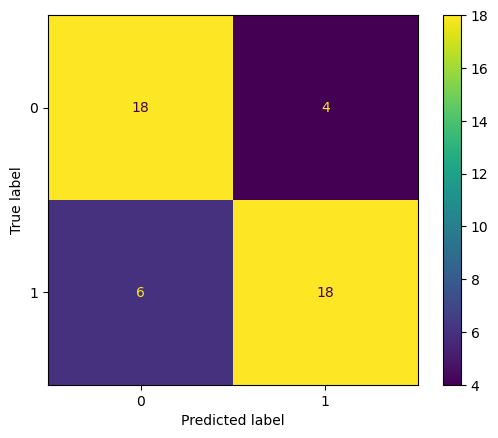

In [142]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

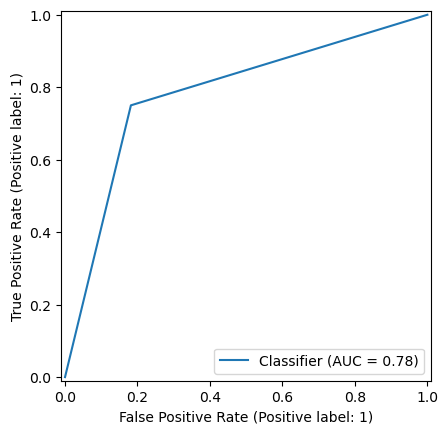

In [146]:
#curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()


#### 8. Interpretar, analizar y documentar los resultados obtenidos


• La precisión indica la proporción de aciertos entre todas las predicciones positivas que efectúa el modelo. Para la clase 'Survived', la exactitud es del 82%, lo que implica que el 82% de los casos que el modelo reconoció como sobrevivientes fueron acertados. 

• El Recall, o tasa de verdaderos positivos, indica la proporción de instancias positivas reales que el modelo identificó correctamente en comparación con todas las instancias positivas reales presentes en el conjunto de datos. En el caso de la clase 'Survived', el Recall se sitúa en un 75%, indicando que el modelo reconoció de manera correcta al 75% de todos los sobrevivientes en el conjunto de datos. 

• El F1 Score, una métrica que integra precisión y recall en un solo valor, ofrece una evaluación equilibrada del rendimiento del modelo. Para la clase 'Survived', el F1 Score se sitúa en 0.78, lo que refleja un equilibrio entre precisión y recall, evidenciando la sólida capacidad del modelo para identificar y clasificar sobrevivientes de forma precisa y completa. 

• El indicador "support" hace alusión a la cantidad de ejemplos reales de cada categoría en el conjunto de datos. Para la categoría 'Survived', el soporte es de 24, lo que indica que existen 24 casos reales de personas que sobrevivieron en el conjunto de datos del Titanic. 

#### A partir de la Matriz de Confusión podemos deducir: 

• Verdaderos negativos: Indican la cantidad de observaciones que el clasificador identificó correctamente como falsas, sumando un total de 18 casos.

• Verdaderos positivos: Se refieren a la cantidad de observaciones que el clasificador identificó acertadamente como verdaderas, sumando un total de 18 casos correctamente reconocidos. 

• Falsos positivos: Representan la cantidad de observaciones que el clasificador identificó erróneamente como verdaderas cuando en realidad eran falsas, con un total de 4 errores. 

• Falsos negativos: Indican cuántas observaciones el clasificador identificó incorrectamente como falsas cuando en realidad eran verdaderas, acumulando un total de 6 casos mal clasificados. 

#### De la Curva de Precisión del modelo se puede deducir: 

• El AUC (Área Bajo la Curva) es 0.78, lo cual señala que el 78% de las predicciones del clasificador son precisas en todos los umbrales de clasificación. Esta métrica ofrece una evaluación de la habilidad del modelo para diferenciar entre clases positivas y negativas, siendo un valor más cercano a 1 indicativo de un mejor desempeño del clasificador en la categorización. En este caso, se podría concluir que el clasificador posee una habilidad adecuada para distinguir entre las clases, pero existe la posibilidad de optimizar su rendimiento. Sería beneficioso investigar otras métricas y hacer modificaciones en el modelo o en los datos cuando sea necesario para mejorar aún más su rendimiento. 
